# <font color='red'>3</font>:30:300:3000

# A. 회귀문제

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'https://bit.ly/BostonFile'
data = pd.read_csv(path)
data.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [3]:
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [4]:
target = 'medv'

x = data.drop(target, axis=1)
y = data[target]

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                 random_state=2022)

## 1. Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('MAE :', mean_absolute_error(y_test,y_pred))
print('R2-score :', r2_score(y_test,y_pred))
print('\n')
print('변수 :', list(x))
print('기울기 :', model.coef_)
print('\n')
print('절편 :', model.intercept_)

MAE : 3.4962689389088837
R2-score : 0.7430693569118809


변수 : ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
기울기 : [-1.04447993e-01  3.82857718e-02  5.00367117e-02  3.06918783e+00
 -1.38572971e+01  4.40479718e+00 -7.59948972e-03 -1.34224578e+00
  3.03499788e-01 -1.19378237e-02 -9.58449847e-01  8.27768652e-03
 -5.38710209e-01]


절편 : 30.936834852137324


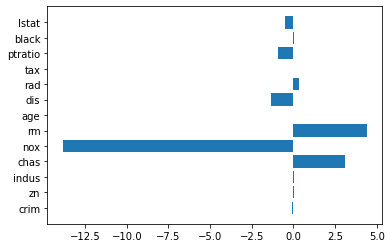

In [21]:
plt.barh(list(x), model.coef_)

plt.show()

## 2. Decision Tree

In [84]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

model = DecisionTreeRegressor(max_depth=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('MAE :', mean_absolute_error(y_test,y_pred))
print('R2-score :', r2_score(y_test,y_pred))


MAE : 3.4714201840983763
R2-score : 0.7225421834596883


In [85]:
model.feature_importances_

# 변수별 영향력

array([0.06142974, 0.        , 0.        , 0.        , 0.        ,
       0.68419403, 0.        , 0.08950513, 0.        , 0.        ,
       0.00463244, 0.        , 0.16023865])

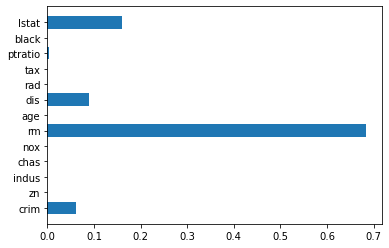

In [86]:
# 변수의 영향력 시각화

plt.barh(list(x),model.feature_importances_)
plt.show()

In [87]:
score = pd.DataFrame()
score['feature']=list(x)
score['importance']=model.feature_importances_
score

,feature,importance
0,crim,0.061430
1,zn,0.000000
2,indus,0.000000
3,chas,0.000000
4,nox,0.000000
5,rm,0.684194
6,age,0.000000
7,dis,0.089505
8,rad,0.000000
9,tax,0.000000


In [88]:
score.sort_values('importance', ascending=True, inplace=True)
score

,feature,importance
1,zn,0.000000
2,indus,0.000000
3,chas,0.000000
4,nox,0.000000
6,age,0.000000
8,rad,0.000000
9,tax,0.000000
11,black,0.000000
10,ptratio,0.004632
0,crim,0.061430


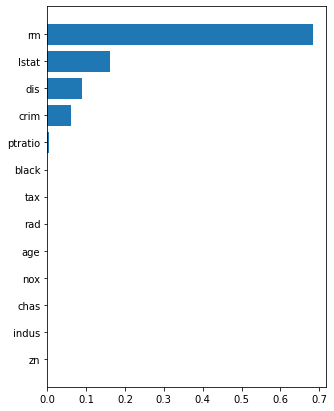

In [89]:
# 변수 중요도 sort 시각화

plt.figure(figsize=(5,7))
plt.barh(score['feature'], score['importance'])
plt.show()

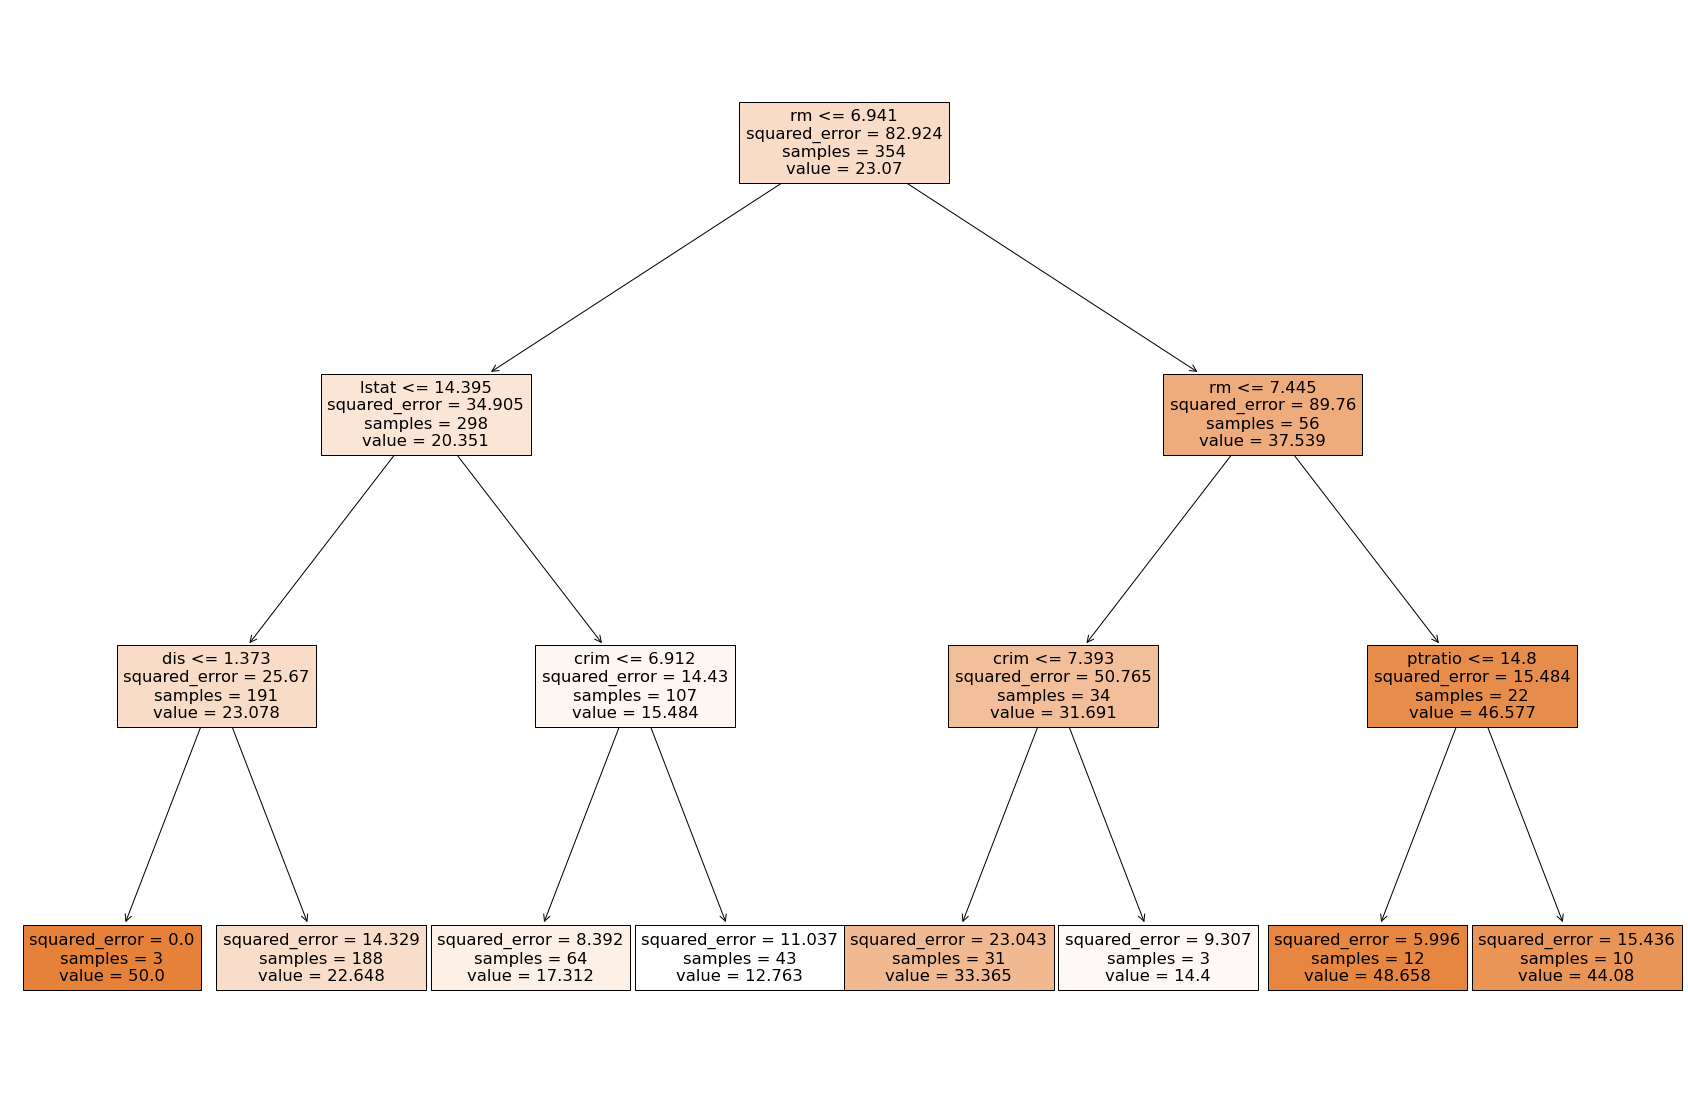

In [94]:
# 트리 시각화
plt.figure(figsize=(30,20))               # 크게 해야 글씨가 보임.
plot_tree(model, 
          filled=True,                    # 색 채우기
          feature_names=list(x))

plt.show()

## 3. KNN

In [113]:
# 정규화

x_train = (x_train-x_train.min()) / (x_train.max()-x_train.min())
x_test = (x_test-x_test.min()) / (x_test.max()-x_test.min())

In [124]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error

model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)



print('MAE :', mean_absolute_error(y_test,y_pred))
print('R2-score :', r2_score(y_test,y_pred))

MAE : 2.723684210526316
R2-score : 0.8340633815332203


# B. 분류문제

In [126]:
path = 'https://bit.ly/AdmissionFile'
data = pd.read_csv(path)
data.head(3)

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0


In [127]:
target = 'ADMIT'

x = data.drop(target, axis=1)
y = data[target]

In [128]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,
                                                 random_state=2022)

## Decision Tree

In [130]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report


model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[80  3]
 [11 56]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        83
           1       0.95      0.84      0.89        67

    accuracy                           0.91       150
   macro avg       0.91      0.90      0.90       150
weighted avg       0.91      0.91      0.91       150



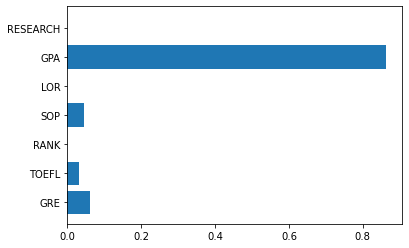

In [131]:
plt.barh(list(x), model.feature_importances_)

plt.show()

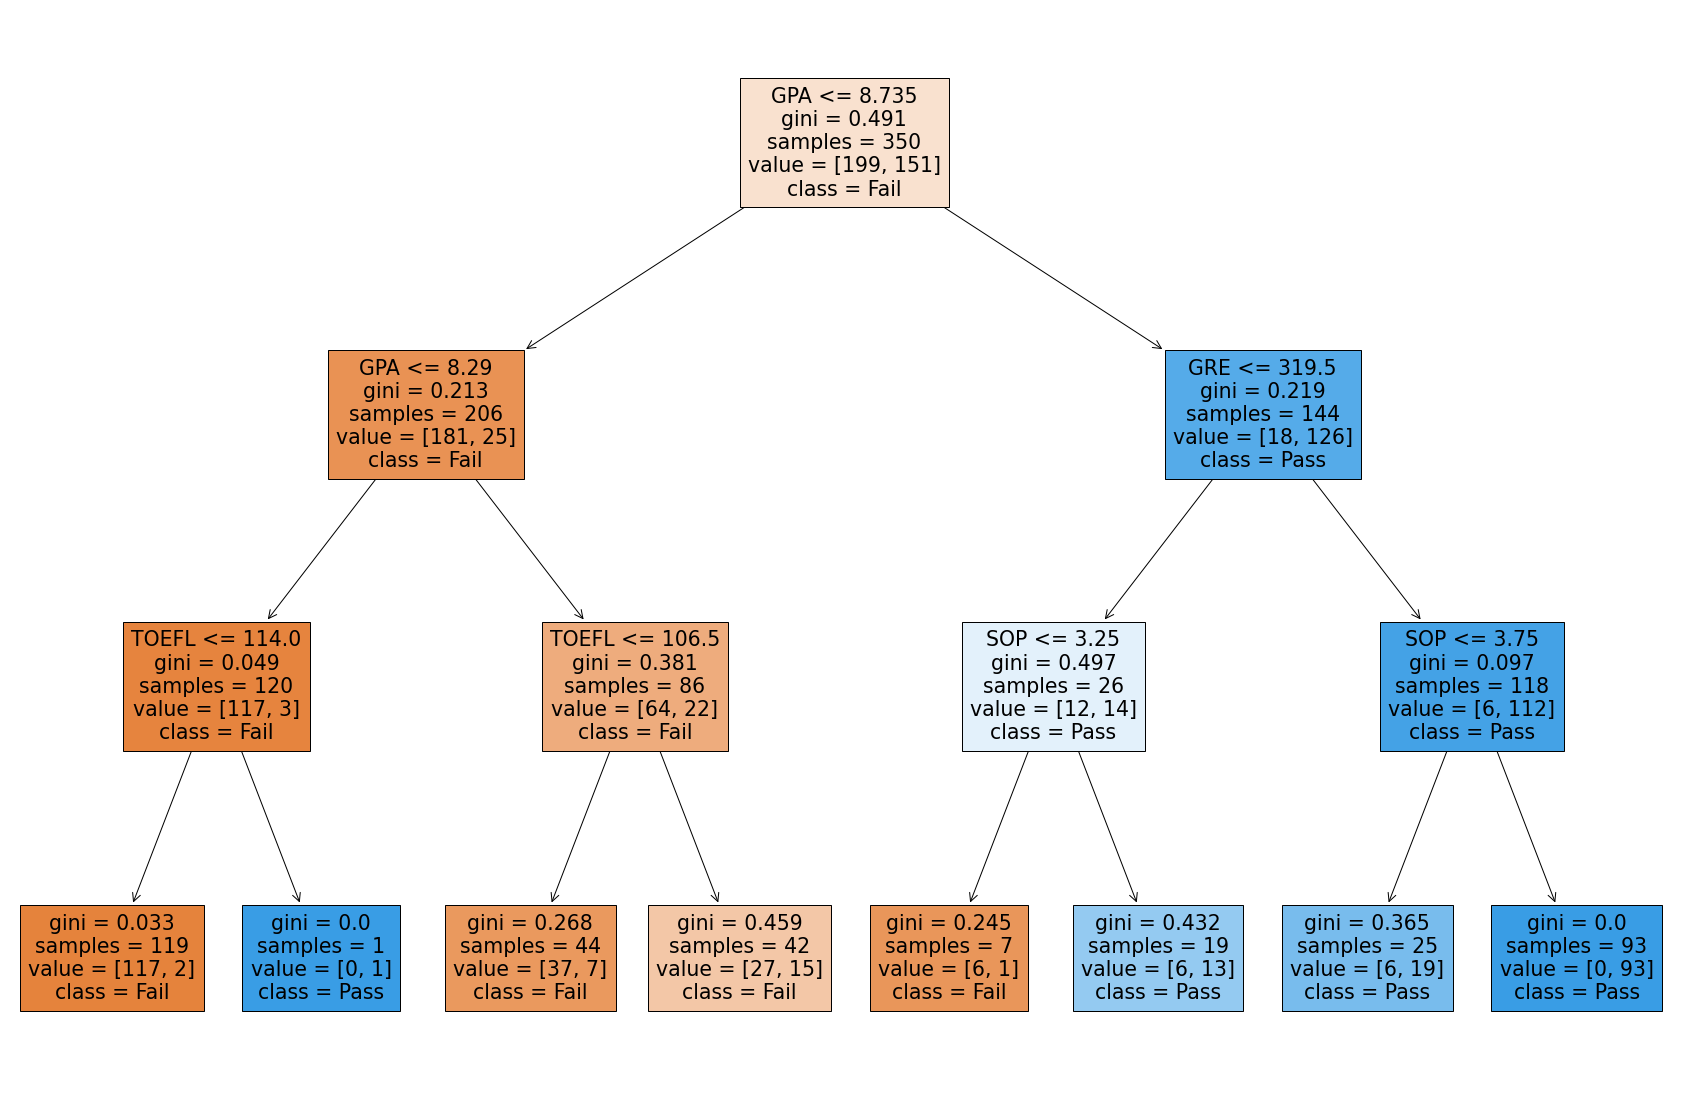

In [135]:
plt.figure(figsize=(30,20))
plot_tree(model,
          filled=True,                          # 이름 선정
          feature_names=list(x),                # 변수 이름
          class_names=['Fail', 'Pass'])         # class 이름 추가

plt.show()